# Imports

In [1]:
import os
import sys
import pandas as pd

# AI content (GitHub Copilot, 02/07/2024), verified and adapted by Nicolas Huber.
src_directory: str = os.path.join(os.getcwd(), "..")
sys.path.append(src_directory)

import algorithms.angle_analyzer as angle_analyzer
import helpers.data_visualizer as data_visualizer
import constants as constants

# Variables

In [2]:
# 200 expects linear, 270 expects curve, 400 expects overlap, 1400 expects straight line, 1320 expects end of curve, 1200 expects start of curve
index: int = 200

# Initialisation

In [3]:
Analyzer: angle_analyzer.AngleAnalyzer = angle_analyzer.AngleAnalyzer(
    "/Users/nicolas/Downloads/test_angle_analyzer.csv",
    constants.ANGLE_PAST_THRESHOLD,
    constants.ANGLE_FUTURE_THRESHOLD,
    constants.ANGLE_THRESHOLD,
    constants.LINEAR_REGRESSION_THRESHOLD
)
Visualizer: data_visualizer.DataVisualizer = data_visualizer.DataVisualizer()

# Data Import

In [4]:
data: pd.DataFrame = Analyzer.read_csv_file()

# Analyze Coordintes

In [5]:
latest_coordinates: pd.DataFrame = Analyzer.extract_latest_coordinates(data, index)
future_coordinates: pd.DataFrame = Analyzer.extract_future_coordinates(data, index)

# Calculate Angles

In [6]:
angles_past: pd.DataFrame = Analyzer.cut_zero_angles(
    Analyzer.calculate_angles(latest_coordinates)
)
angles_future: pd.DataFrame = Analyzer.cut_zero_angles(
    Analyzer.calculate_angles(future_coordinates)
)

# Visualisation

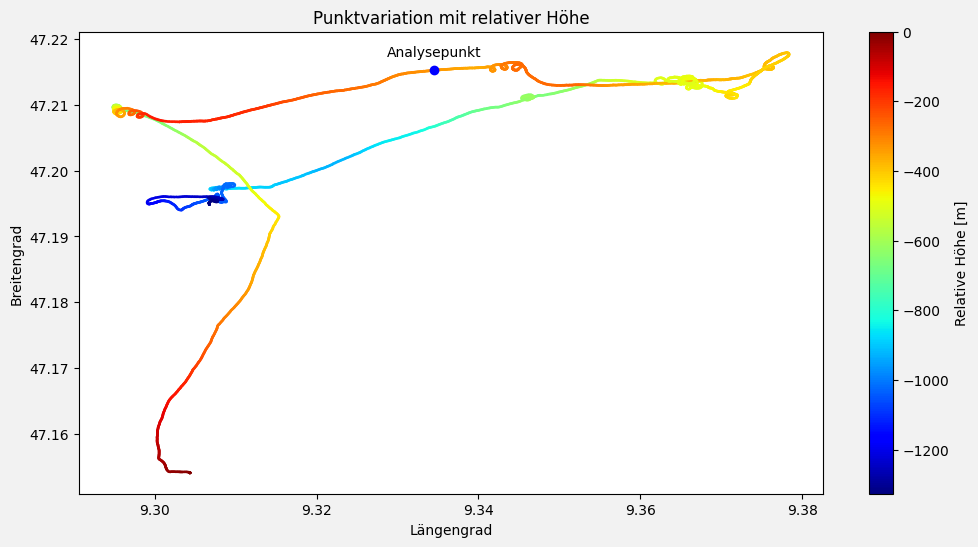

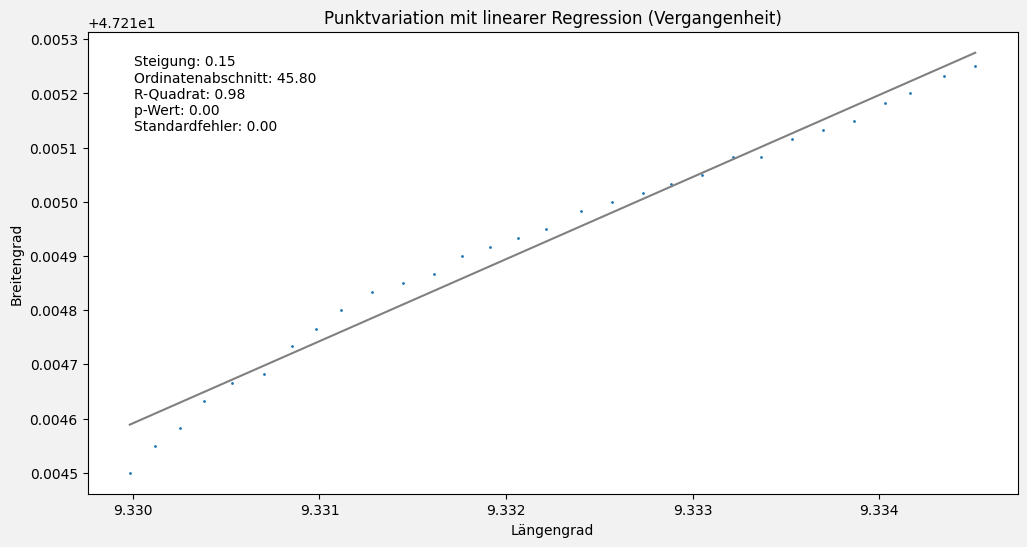

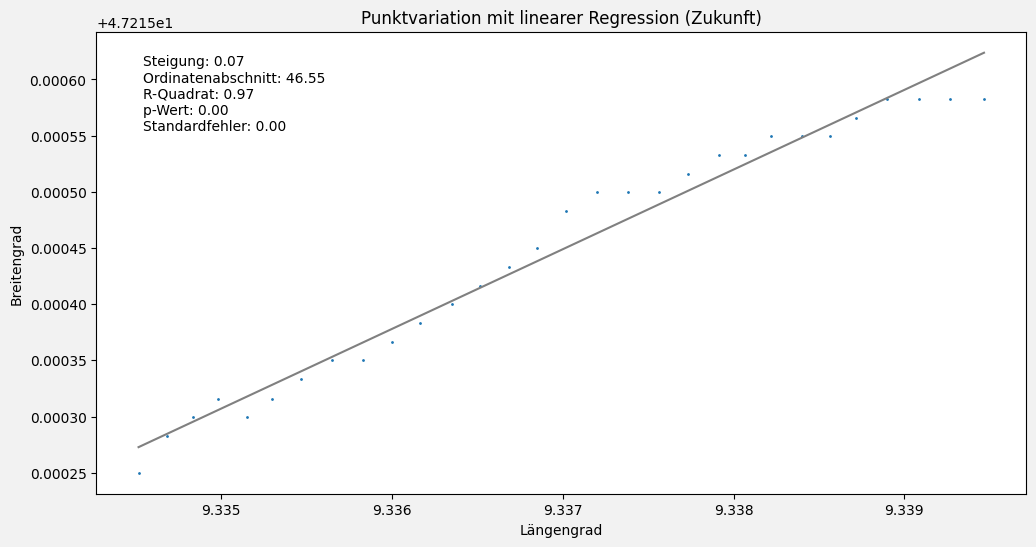

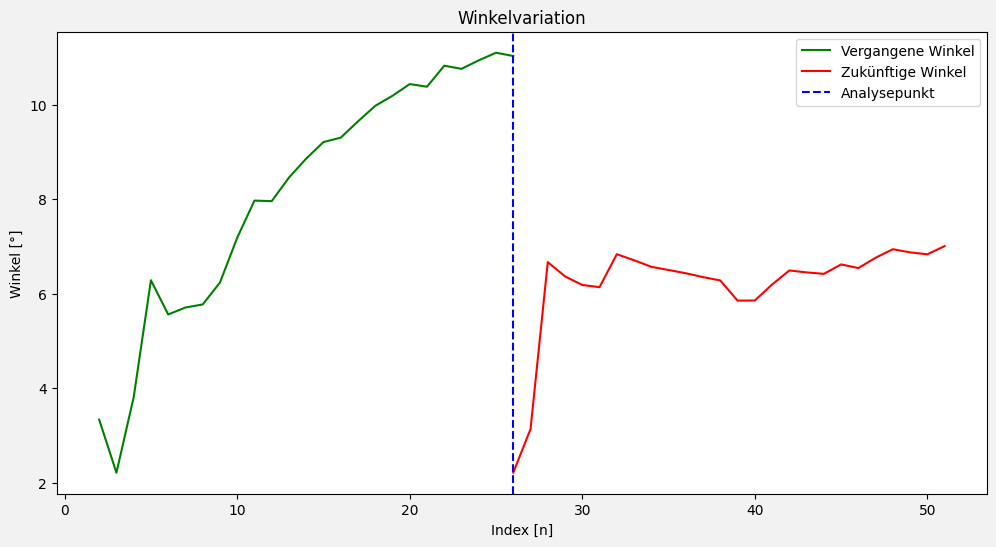

In [7]:
Visualizer.visualize_points_colored(data, index)
Visualizer.visualize_points_2d(latest_coordinates, 0, True, "Vergangenheit")
Visualizer.visualize_points_2d(future_coordinates, 0, True, "Zukunft")
Visualizer.visualize_angles(angles_past, angles_future)

# Analysis

In [8]:
status_angle_past: bool = Analyzer.analyze_angles(angles_past)
status_angle_future: bool = Analyzer.analyze_angles(angles_future)
(
    status_regression_past,
    slope_past,
    intercept_past,
    r_value_past,
    p_value_past,
    std_err_past,
) = Analyzer.analyze_linear_regression(latest_coordinates)
(
    status_regression_future,
    slope_future,
    intercept_future,
    r_value_future,
    p_value_future,
    std_err_future,
) = Analyzer.analyze_linear_regression(future_coordinates)

# Output

In [9]:
print("\n<------- START: INITIALISATION PROCESS------> \n")

print(
    f"The program is ready for execution and will run using the following parameters:"
)
print(f"--> Angle Threshold: {constants.ANGLE_THRESHOLD}°")

print("\n<------- END: INITIALISATION PROCESS ------>")
print("<------- START: IMPORTING DATA ------>\n")

print("lenght: " + str(len(data)))
print()
print(data)

print("\n<------- END: IMPORTING DATA ------>")
print("<------- START: ANALYZING COORDINATES ------>\n")

print("Past Coordinates")
print("--> lenght: " + str(len(latest_coordinates)))
print()
print(latest_coordinates)
print()

print("Future Coordinates")
print("--> lenght: " + str(len(future_coordinates)))
print()
print(future_coordinates)

print("\n<------- END: ANALYZING COORDINATES ------>")
print("<------- START: CALCULATING ANGLES ------>\n")

print("Past Angles")
print("--> lenght: " + str(len(angles_past)))
print()
print(angles_past)

print()

print("Future Angles")
print("--> lenght: " + str(len(angles_future)))
print()
print(angles_future)

print("\n<------- END: CALCULATING ANGLES ------>")
print("<------- START: ANALYSIS ------>\n")

print("Angle Analysis")
print("--> Past: " + str(status_angle_past))
print("--> Future: " + str(status_angle_future))

print()

print("Past Linear Regression")
print("--> Status: " + str(status_regression_past))
print("--> Slope: " + str(slope_past))
print("--> Intercept: " + str(intercept_past))
print("--> R-Value: " + str(r_value_past))
print("--> P-Value: " + str(p_value_past))
print("--> Standard Error: " + str(std_err_past))

print()

print("Future Linear Regression")
print("--> Status: " + str(status_regression_future))
print("--> Slope: " + str(slope_future))
print("--> Intercept: " + str(intercept_future))
print("--> R-Value: " + str(r_value_future))
print("--> P-Value: " + str(p_value_future))
print("--> Standard Error: " + str(std_err_future))

print()

print("Data Analysis")
print(
    f"--> Status: {Analyzer.analyze_data(status_angle_past, status_regression_past, status_angle_future, status_regression_future)}"
)

print("\n<------- END: ANALYSIS ------>")
print("<------- START: SYSTEM INFO ------>\n")

print(f"@ Version {constants.VERSION}")
print(f"@ Author {constants.AUTHOR}")
print(f"@ Author Email {constants.AUTHOR_EMAIL}")
print(f"@ Author URL {constants.AUTHOR_URL}")
print(f"@ GitHub URL {constants.GITHUB_URL}")

print("\n<------- END: SYSTEM INFO ------>")
print("Process finished with exit code 0")



<------- START: INITIALISATION PROCESS------> 

The program is ready for execution and will run using the following parameters:
--> Angle Threshold: 20°

<------- END: INITIALISATION PROCESS ------>
<------- START: IMPORTING DATA ------>

lenght: 3959

     timestamp [UTC]  relative altitude [m]  horizontal velocity[m/s]  \
0           10:54:46                 -163.0                     15.28   
1           10:54:47                 -164.0                     13.89   
2           10:54:48                 -163.0                     12.50   
3           10:54:49                 -163.0                     11.39   
4           10:54:50                 -163.0                     11.39   
...              ...                    ...                       ...   
3954        11:09:54                 -484.0                      9.72   
3955        11:09:55                 -485.0                     10.56   
3956        11:09:56                 -486.0                     10.56   
3957        11:0